In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime
from sklearn import preprocessing

C:\Users\dnjsw\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\dnjsw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dnjsw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dnjsw\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [2]:
df = pd.read_csv("product_price.csv") 

In [3]:
#만약 데이터 불러오면 리스트로 선언

In [4]:
price = df['total']
price_max = max(price)
price_min = min(price)
price_max

114000

In [5]:
price = ((price-price_min)/(price_max-price_min))

In [6]:
price

0     0.000000
1     0.046729
2     0.098131
3     0.135514
4     0.112150
5     0.191589
6     0.205607
7     0.233645
8     0.228972
9     0.280374
10    0.294393
11    0.327103
12    0.331776
13    0.378505
14    0.392523
15    0.420561
16    0.467290
17    0.443925
18    0.485981
19    0.514019
20    0.532710
21    0.565421
22    0.584112
23    0.560748
24    0.654206
25    0.626168
26    0.663551
27    0.700935
28    0.747664
29    0.766355
30    0.794393
31    0.808411
32    0.845794
33    0.813084
34    0.915888
35    0.934579
36    1.000000
37    0.981308
Name: total, dtype: float64

In [7]:
#creaete Windows
seq_len = 10 #최근 10일에 데이터를 가지고 미래 예측
sequence_length = seq_len + 1

result = []
for index in range(len(price)-sequence_length):
    result.append(price[index:index+sequence_length])

In [8]:
normalized_data = []
for window in result:
    normalized_data.append(window)
result = np.array(normalized_data)

In [9]:
row = int(round(result.shape[0]*0.7))
train = result[:row,:]
np.random.shuffle(train)

x_train = train[:,:-1]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test = result[row:,-1]

x_train.shape, x_test.shape

((19, 10, 1), (8, 10, 1))

In [10]:
model = Sequential()
model.add(LSTM(10, return_sequences = True, input_shape=(10,1)))
model.add(LSTM(16,return_sequences = False))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='rmsprop')
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 10)            480       
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 2,225
Trainable params: 2,225
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          batch_size=1,
          epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 19 samples, validate on 8 samples
Epoch 1/10
19/19 [==============================] - 1s 78ms/step - loss: 0.1417 - val_loss: 0.1994
Epoch 2/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0149 - val_loss: 0.0224
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0186
Epoch 4/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0032 - val_loss: 0.0239
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0062
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0127
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0113
Epoch 8/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0010 - val_loss: 0.0081
Epoch 9/10
19/19 [==============================] - 0s 12ms/step - lo

In [12]:
pred = model.predict(x_test)
pred

array([[0.7337387 ],
       [0.7576159 ],
       [0.78265184],
       [0.80685985],
       [0.83223206],
       [0.85874784],
       [0.8819141 ],
       [0.9098079 ]], dtype=float32)

In [30]:
result = pred[-1]*(price_max-price_min)+price_max

In [33]:
price_prediction = "%0.2f"%result
print(price_prediction)

211349.45


In [15]:
pred[-1]*((price_max-price_min))

array([97349.44748878])

<Figure size 432x288 with 0 Axes>

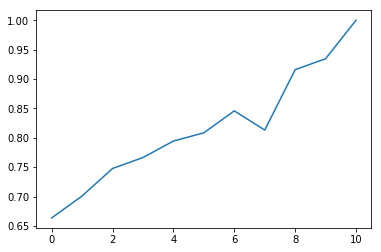

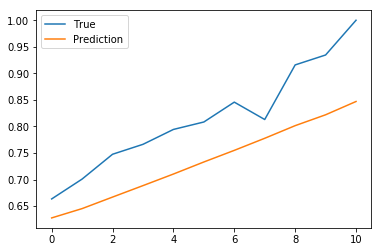

In [71]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test,label = 'True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()